<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Multivariate_Time_Series_Modeling_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('Solar_2013_Prep.csv')

In [4]:
df

,Unnamed: 0,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,season,Date_time,TS1_P1_data,Wx,Wy
0,357,27,1007,76,25,79,Summer,1/1/2013 5:57,24,0.209397,5.996345
1,358,27,1007,76,25,83,Summer,1/1/2013 5:58,26,0.209397,5.996345
2,359,27,1007,76,25,84,Summer,1/1/2013 5:59,23,0.279196,7.995127
3,360,27,1007,76,25,86,Summer,1/1/2013 6:00,24,2.150208,5.601483
4,361,27,1007,76,25,88,Summer,1/1/2013 6:01,25,1.026060,2.819078
...,...,...,...,...,...,...,...,...,...,...,...
157790,437982,25,1010,65,22,21,Spring,11/12/2013 18:30,6,-7.853017,-1.526472
157791,437983,25,1010,65,22,19,Spring,11/12/2013 18:31,6,-13.119296,-7.272144
157792,437984,25,1010,65,22,19,Spring,11/12/2013 18:32,4,-10.495436,-5.817715
157793,437985,24,1010,65,22,18,Spring,11/12/2013 18:33,4,-7.714506,-4.635343


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157795 entries, 0 to 157794
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   157795 non-null  int64  
 1   TS1_SENS0700_TmpMdul_C_data  157795 non-null  int64  
 2   Barometer_data               157795 non-null  int64  
 3   Outside_Humidity_data        157795 non-null  int64  
 4   Outside_Temperature_data     157795 non-null  int64  
 5   Solar_Radiation_data         157795 non-null  int64  
 6   season                       157795 non-null  object 
 7   Date_time                    157795 non-null  object 
 8   TS1_P1_data                  157795 non-null  int64  
 9   Wx                           157795 non-null  float64
 10  Wy                           157795 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 13.2+ MB


In [6]:
df.shape

(157795, 11)

In [7]:
df['Date_time_name'] = df['Date_time']

In [8]:
df['Date_time'] = pd.to_datetime(df['Date_time'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cb49d6d60>,
      dtype=object)

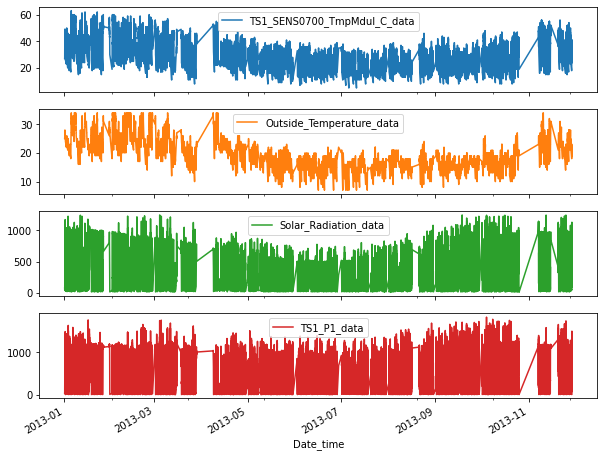

In [9]:
df.set_index('Date_time')[['TS1_SENS0700_TmpMdul_C_data', 'Outside_Temperature_data','Solar_Radiation_data','TS1_P1_data']].plot(subplots=True)

In [10]:
df.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'Date_time', 'TS1_P1_data', 'Wx',
       'Wy', 'Date_time_name'],
      dtype='object')

In [11]:
#df=df[::5]
#df

In [12]:
date_time = pd.to_datetime(df.pop('Date_time'), format='%d/%m/%Y %H:%M')
date_time

0        2013-01-01 05:57:00
1        2013-01-01 05:58:00
2        2013-01-01 05:59:00
3        2013-01-01 06:00:00
4        2013-01-01 06:01:00
                 ...        
157790   2013-11-12 18:30:00
157791   2013-11-12 18:31:00
157792   2013-11-12 18:32:00
157793   2013-11-12 18:33:00
157794   2013-11-12 18:34:00
Name: Date_time, Length: 157795, dtype: datetime64[ns]

In [13]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [14]:
import numpy as np
day = 24*60*5
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [15]:
df.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'TS1_P1_data', 'Wx', 'Wy',
       'Date_time_name', 'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [16]:
df

,Unnamed: 0,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,season,TS1_P1_data,Wx,Wy,Date_time_name,Day sin,Day cos,Year sin,Year cos
0,357,27,1007,76,25,79,Summer,24,0.209397,5.996345,1/1/2013 5:57,-1.564345e-01,9.876883e-01,0.168553,0.985693
1,358,27,1007,76,25,83,Summer,26,0.209397,5.996345,1/1/2013 5:58,-1.045285e-01,9.945219e-01,0.168694,0.985668
2,359,27,1007,76,25,84,Summer,23,0.279196,7.995127,1/1/2013 5:59,-5.233596e-02,9.986295e-01,0.168835,0.985644
3,360,27,1007,76,25,86,Summer,24,2.150208,5.601483,1/1/2013 6:00,-1.081356e-11,1.000000e+00,0.168977,0.985620
4,361,27,1007,76,25,88,Summer,25,1.026060,2.819078,1/1/2013 6:01,5.233596e-02,9.986295e-01,0.169118,0.985596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157790,437982,25,1010,65,22,21,Spring,6,-7.853017,-1.526472,11/12/2013 18:30,1.000000e+00,8.150907e-12,0.620703,-0.784045
157791,437983,25,1010,65,22,19,Spring,6,-13.119296,-7.272144,11/12/2013 18:31,9.986295e-01,-5.233596e-02,0.620591,-0.784134
157792,437984,25,1010,65,22,19,Spring,4,-10.495436,-5.817715,11/12/2013 18:32,9.945219e-01,-1.045285e-01,0.620479,-0.784223
157793,437985,24,1010,65,22,18,Spring,4,-7.714506,-4.635343,11/12/2013 18:33,9.876883e-01,-1.564345e-01,0.620366,-0.784312


In [17]:
df.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'TS1_P1_data', 'Wx', 'Wy',
       'Date_time_name', 'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [18]:
df1_new = df.set_index('Date_time_name')           # Applying the set_index method
print(df1_new)  

                  Unnamed: 0  TS1_SENS0700_TmpMdul_C_data  Barometer_data  \
Date_time_name                                                              
1/1/2013 5:57            357                           27            1007   
1/1/2013 5:58            358                           27            1007   
1/1/2013 5:59            359                           27            1007   
1/1/2013 6:00            360                           27            1007   
1/1/2013 6:01            361                           27            1007   
...                      ...                          ...             ...   
11/12/2013 18:30      437982                           25            1010   
11/12/2013 18:31      437983                           25            1010   
11/12/2013 18:32      437984                           25            1010   
11/12/2013 18:33      437985                           24            1010   
11/12/2013 18:34      437986                           24            1010   

In [19]:
df1_new.columns

Index(['Unnamed: 0', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data', 'season', 'TS1_P1_data', 'Wx', 'Wy', 'Day sin',
       'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [20]:
df1_new = df1_new.loc[df1_new['TS1_P1_data']<=1150]

In [21]:
df1_new = df1_new.loc[df1_new['TS1_P1_data']>50]

In [22]:
df1_new.shape

(128934, 14)

In [23]:
print(df1_new['season'].value_counts())

Autumn    36423
Winter    35661
Spring    32612
Summer    24238
Name: season, dtype: int64


In [24]:
Spring=df1_new[df1_new['season']=='Spring'] #Spring

Autumn=df1_new[df1_new['season']=='Autumn'] #Autumn

Winter=df1_new[df1_new['season']=='Winter'] #Spring

Summer=df1_new[df1_new['season']=='Summer'] #Autumn

In [25]:
print("Spring",Spring.shape)
print("Autumn",Autumn.shape)
print("Winter",Winter.shape)
print("Summer",Summer.shape)

Spring (32612, 14)
Autumn (36423, 14)
Winter (35661, 14)
Summer (24238, 14)


**Springs**
---

In [26]:
dfSpring =Spring[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [27]:
dfSpring.shape

(32612, 12)

In [28]:
dfSpring.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,0.075991,-1.445458
TS1_SENS0700_TmpMdul_C_data,0.314899,-0.553304
Barometer_data,-0.073813,-0.673264
Outside_Humidity_data,-0.417640,-0.319017
Outside_Temperature_data,0.770696,0.589642
Solar_Radiation_data,0.667905,-0.391781
Wx,0.120860,-0.621452
Wy,-0.077373,-0.509364
Day sin,-0.002051,-1.507495
Day cos,0.017040,-1.491460


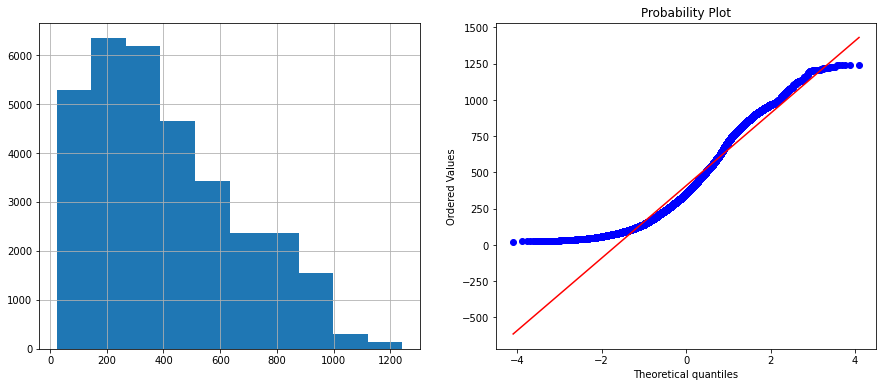

In [29]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(dfSpring,'Solar_Radiation_data')

<ipython-input-30-011626fb72d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSpring['Solar_Radiation_data_SQ']=dfSpring.Solar_Radiation_data**(1/2)


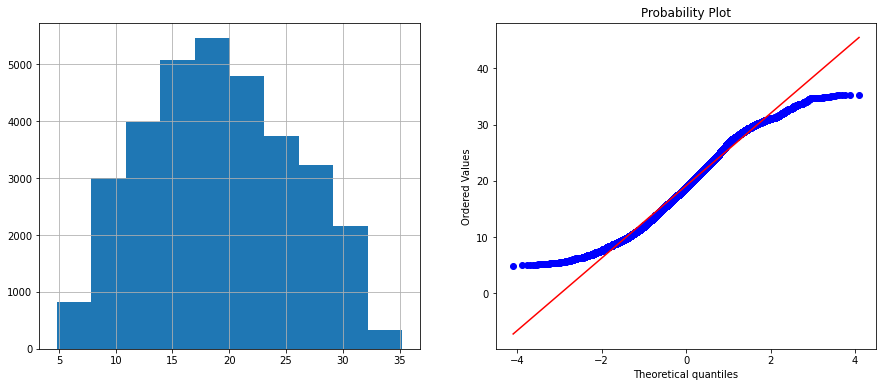

In [30]:
dfSpring['Solar_Radiation_data_SQ']=dfSpring.Solar_Radiation_data**(1/2)
diagnostic_plots(dfSpring,'Solar_Radiation_data_SQ')

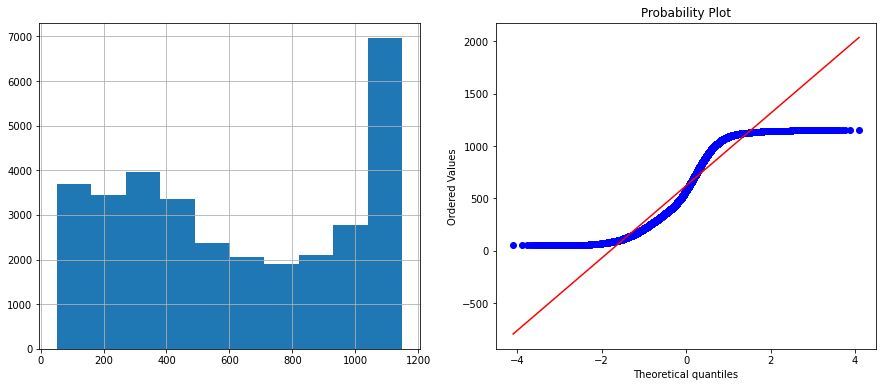

In [31]:
diagnostic_plots(dfSpring,'TS1_P1_data')

In [32]:
dfSpring.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,0.075991,-1.445458
TS1_SENS0700_TmpMdul_C_data,0.314899,-0.553304
Barometer_data,-0.073813,-0.673264
Outside_Humidity_data,-0.417640,-0.319017
Outside_Temperature_data,0.770696,0.589642
Solar_Radiation_data,0.667905,-0.391781
Wx,0.120860,-0.621452
Wy,-0.077373,-0.509364
Day sin,-0.002051,-1.507495
Day cos,0.017040,-1.491460


In [33]:
dfSpring =dfSpring[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data_SQ','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

Autumn
---

In [34]:
dfAutumn =Autumn[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [35]:
dfAutumn.shape

(36423, 12)

In [36]:
dfAutumn.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,0.032460,-1.408464
TS1_SENS0700_TmpMdul_C_data,0.189361,0.021641
Barometer_data,0.112590,0.001871
Outside_Humidity_data,-0.019220,-0.281082
Outside_Temperature_data,0.203838,0.315809
Solar_Radiation_data,0.496981,-0.597873
Wx,0.247399,0.282629
Wy,-0.040105,0.354275
Day sin,0.000014,-1.493787
Day cos,-0.063956,-1.501738


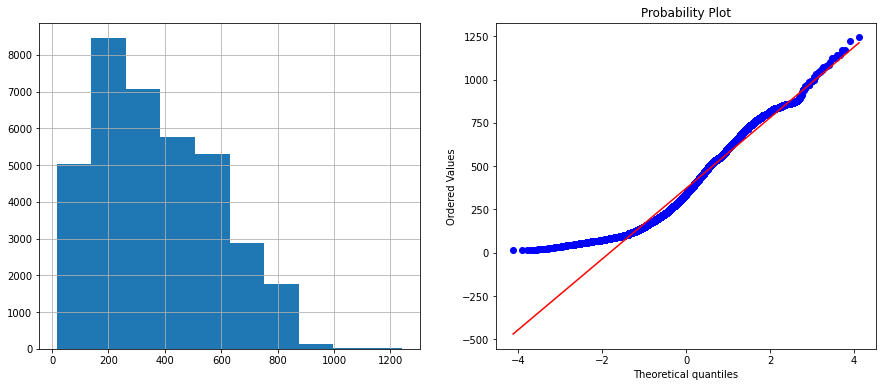

In [37]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(dfAutumn,'Solar_Radiation_data')

<ipython-input-38-c2d9375c9eb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAutumn['Solar_Radiation_data_SQ']=dfAutumn.Solar_Radiation_data**(1/2)


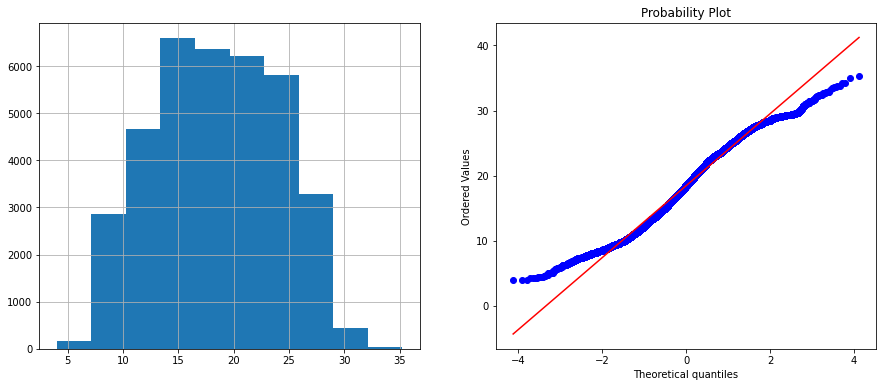

In [38]:
dfAutumn['Solar_Radiation_data_SQ']=dfAutumn.Solar_Radiation_data**(1/2)
diagnostic_plots(dfAutumn,'Solar_Radiation_data_SQ')

In [39]:
dfAutumn =dfAutumn[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data_SQ','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

Winter
---

In [40]:
dfWinter =Winter[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [41]:
dfWinter.shape

(35661, 12)

In [42]:
dfWinter.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,-0.031718,-1.418338
TS1_SENS0700_TmpMdul_C_data,-0.162623,-0.408721
Barometer_data,-0.200292,-0.353156
Outside_Humidity_data,-0.070632,-0.633474
Outside_Temperature_data,-0.501500,0.225546
Solar_Radiation_data,0.465741,-0.551980
Wx,-0.077067,0.168524
Wy,-0.005740,0.445019
Day sin,-0.038882,-1.498146
Day cos,-0.044776,-1.500843


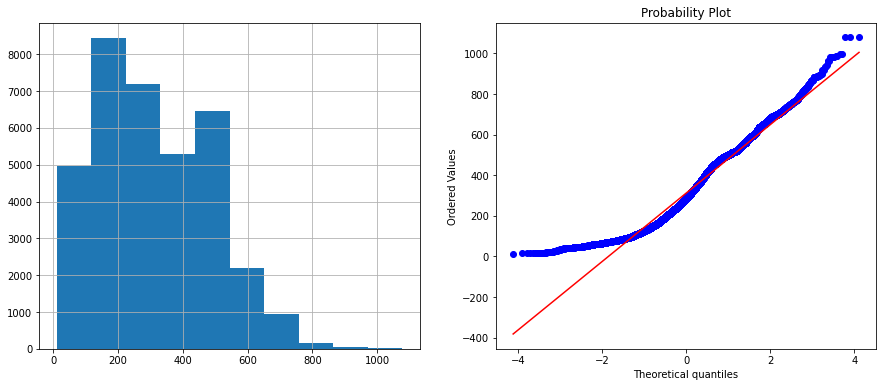

In [43]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(dfWinter,'Solar_Radiation_data')

<ipython-input-44-b5bd085b8008>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWinter['Solar_Radiation_data_SQ']=dfWinter.Solar_Radiation_data**(1/2)


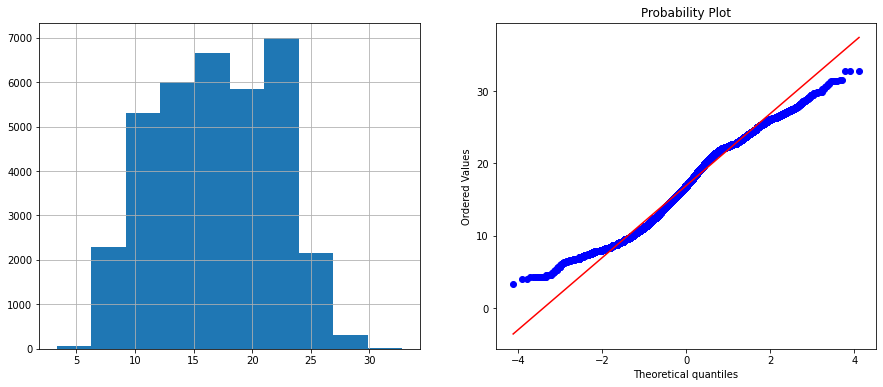

In [44]:
dfWinter['Solar_Radiation_data_SQ']=dfWinter.Solar_Radiation_data**(1/2)
diagnostic_plots(dfWinter,'Solar_Radiation_data_SQ')

In [45]:
dfAutumn =dfAutumn[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data_SQ','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

Summer
---

In [46]:
dfSummer =Summer[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [47]:
dfSummer.shape

(24238, 12)

In [48]:
dfSummer.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,-0.413919,-1.216018
TS1_SENS0700_TmpMdul_C_data,-0.067535,-0.696330
Barometer_data,0.444637,-0.381655
Outside_Humidity_data,-0.038425,-0.770540
Outside_Temperature_data,-0.033492,-0.896693
Solar_Radiation_data,0.163196,-1.123423
Wx,0.361166,0.124921
Wy,-0.067269,-0.726378
Day sin,-0.030525,-1.506113
Day cos,0.001080,-1.498934


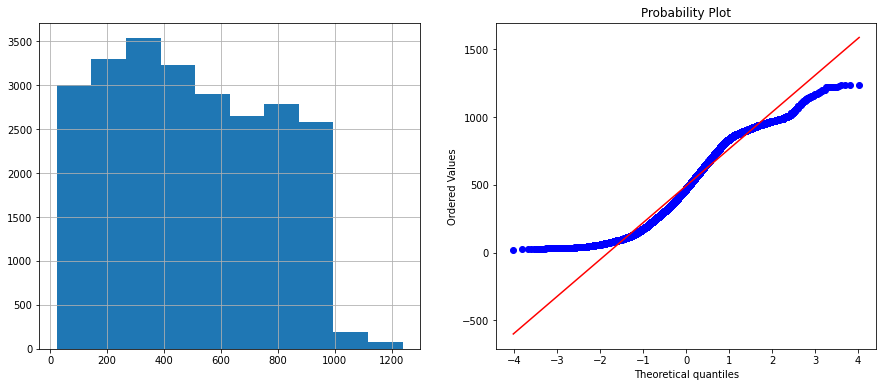

In [49]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(dfSummer,'Solar_Radiation_data')

<ipython-input-50-37f524894845>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSummer['Solar_Radiation_data_SQ']=dfSummer.Solar_Radiation_data**(1/2)


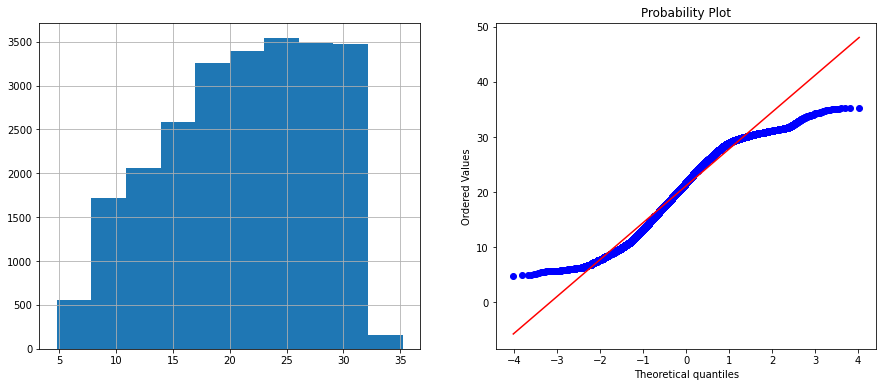

In [50]:
dfSummer['Solar_Radiation_data_SQ']=dfSummer.Solar_Radiation_data**(1/2)
diagnostic_plots(dfSummer,'Solar_Radiation_data_SQ')

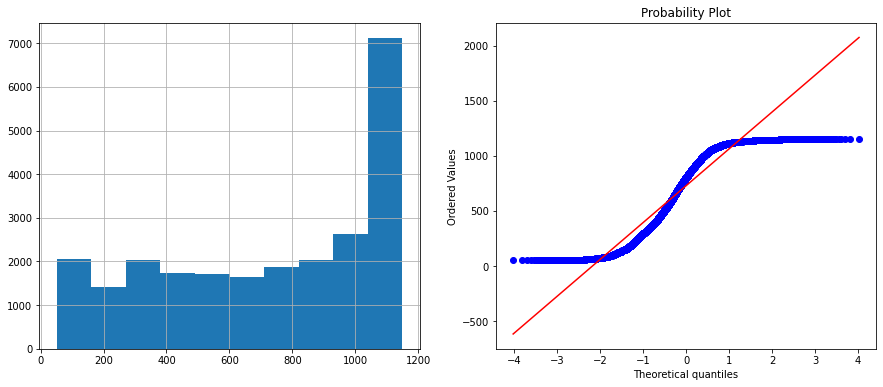

In [51]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
diagnostic_plots(dfSummer,'TS1_P1_data')

In [52]:
dfSummer.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
TS1_P1_data,-0.413919,-1.216018
TS1_SENS0700_TmpMdul_C_data,-0.067535,-0.696330
Barometer_data,0.444637,-0.381655
Outside_Humidity_data,-0.038425,-0.770540
Outside_Temperature_data,-0.033492,-0.896693
Solar_Radiation_data,0.163196,-1.123423
Wx,0.361166,0.124921
Wy,-0.067269,-0.726378
Day sin,-0.030525,-1.506113
Day cos,0.001080,-1.498934


In [53]:
dfSummer =dfSummer[['TS1_P1_data','TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data_SQ','Wx','Wy', 'Day sin','Day cos','Year sin', 'Year cos']]

In [54]:
dfSummer.describe()

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos
count,24238.000000,24238.000000,24238.000000,24238.000000,24238.000000,24238.000000,24238.000000,24238.000000,24238.000000,2.423800e+04,24238.000000,24238.000000
mean,728.148280,41.304398,1011.268050,51.243749,26.446406,21.160556,-2.660995,1.669269,0.014089,1.300678e-03,0.070813,-0.125414
std,352.139771,9.254044,3.837315,16.597818,4.300306,6.802979,7.771826,7.325192,0.708480,7.056188e-01,0.721920,0.676852
min,51.000000,13.000000,1002.000000,15.000000,14.000000,4.795832,-23.492316,-14.184194,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,415.000000,34.000000,1008.000000,38.000000,23.000000,16.062378,-7.922145,-4.104242,-0.707107,-7.071068e-01,-0.711846,-0.794672
50%,803.000000,41.000000,1011.000000,53.000000,26.000000,21.702534,-2.996853,1.810492,0.052336,-1.305490e-11,0.231728,-0.179328
75%,1069.000000,48.000000,1014.000000,63.000000,30.000000,27.073973,1.562834,7.281153,0.707107,7.071068e-01,0.777582,0.522465
max,1150.000000,63.000000,1021.000000,93.000000,34.000000,35.199432,23.070281,18.912258,1.000000,1.000000e+00,0.999999,0.999855


**Springs-LSTM**
---

In [55]:
dfSpring

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos
Date_time_name,,,,,,,,,,,,
9/1/2013 12:00,164,26,1017,76,19,12.767145,3.803564,8.156770,9.473316e-11,1.000000,0.118933,0.992902
9/1/2013 12:01,153,26,1017,76,19,12.449900,1.854102,5.706339,5.233596e-02,0.998630,0.119075,0.992885
9/1/2013 12:02,149,26,1017,77,19,12.206556,0.418539,5.985384,1.045285e-01,0.994522,0.119218,0.992868
9/1/2013 12:03,140,25,1017,77,19,11.874342,7.878462,1.389185,1.564345e-01,0.987688,0.119360,0.992851
9/1/2013 12:04,138,25,1017,77,19,11.618950,1.530904,10.892949,2.079117e-01,0.978148,0.119502,0.992834
...,...,...,...,...,...,...,...,...,...,...,...,...
11/12/2013 18:16,309,29,1010,63,23,6.480741,-11.024625,-6.888950,7.431448e-01,0.669131,0.622276,-0.782798
11/12/2013 18:18,237,29,1010,64,23,6.324555,-23.070281,-6.615297,8.090170e-01,0.587785,0.622051,-0.782976
11/12/2013 18:19,176,28,1010,64,22,6.244998,-9.428840,-5.665419,8.386706e-01,0.544639,0.621939,-0.783066


In [56]:
scaler = MinMaxScaler()
data_scaled_SP = scaler.fit_transform(dfSpring)

In [57]:
data_scaled_SP

array([[0.10282075, 0.375     , 0.57692308, ..., 1.        , 0.55946628,
        0.99674485],
       [0.09281165, 0.375     , 0.57692308, ..., 0.99931477, 0.55953745,
        0.99673632],
       [0.08917197, 0.375     , 0.57692308, ..., 0.99726095, 0.55960861,
        0.99672778],
       ...,
       [0.11373976, 0.41666667, 0.30769231, ..., 0.77231952, 0.81096942,
        0.10849915],
       [0.06278435, 0.41666667, 0.30769231, ..., 0.75      , 0.81091329,
        0.10845456],
       [0.05823476, 0.41666667, 0.30769231, ..., 0.72699525, 0.81085715,
        0.10840998]])

In [58]:
featuresSP=data_scaled_SP
targetSP=data_scaled_SP[:,0]

In [59]:
#TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

In [60]:
x_trainSP, x_testSP, y_trainSP, y_testSP = train_test_split(featuresSP, targetSP, test_size=0.20, random_state=123, shuffle = False)

In [61]:
x_trainSP.shape

(26089, 12)

In [62]:
x_testSP.shape

(6523, 12)

In [63]:
win_length=720
batch_size=32
num_features=12
train_generatorSP = TimeseriesGenerator(x_trainSP, y_trainSP, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorSP = TimeseriesGenerator(x_testSP, y_testSP, length=win_length, sampling_rate=1, batch_size=batch_size)

In [64]:
from keras.regularizers import L1L2
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))#kernel_regularizer = L1L2(l1=0.00, l2=0.001)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          72192     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [66]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.mean_absolute_percentage_error])

history = model.fit_generator(train_generatorSP, epochs=3,
                    validation_data=test_generatorSP,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/3


<ipython-input-66-0b099ffdda1e>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generatorSP, epochs=3,


793/793 [==============================] - 81s 91ms/step - loss: 0.0527 - mean_absolute_percentage_error: 272550.2188 - val_loss: 0.0289 - val_mean_absolute_percentage_error: 52503.0117
Epoch 2/3
793/793 [==============================] - 69s 87ms/step - loss: 0.0259 - mean_absolute_percentage_error: 152267.0312 - val_loss: 0.0212 - val_mean_absolute_percentage_error: 15849.7725
Epoch 3/3
793/793 [==============================] - 70s 89ms/step - loss: 0.0204 - mean_absolute_percentage_error: 103569.2734 - val_loss: 0.0214 - val_mean_absolute_percentage_error: 148701.2031


In [67]:
model.evaluate_generator(test_generatorSP, verbose=0)  

<ipython-input-67-af8602536527>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generatorSP, verbose=0)


[0.021427296102046967, 148701.203125]

In [68]:
predictionsSP=model.predict_generator(test_generatorSP)

<ipython-input-68-b1e60d2b2597>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsSP=model.predict_generator(test_generatorSP)


In [69]:
predictionsSP.shape[0]

5803

In [70]:
predictionsSP

array([[0.88074005],
       [0.8838438 ],
       [0.88204545],
       ...,
       [0.21756467],
       [0.1765382 ],
       [0.14071715]], dtype=float32)

In [71]:
y_testSP

array([0.69426752, 0.69244768, 0.71246588, ..., 0.11373976, 0.06278435,
       0.05823476])

In [72]:
x_testSP

array([[0.69426752, 0.60416667, 0.53846154, ..., 0.9890738 , 0.67034963,
        0.02992272],
       [0.69244768, 0.60416667, 0.53846154, ..., 0.99384417, 0.67028224,
        0.02989829],
       [0.71246588, 0.58333333, 0.53846154, ..., 0.99726095, 0.67021484,
        0.02987388],
       ...,
       [0.11373976, 0.41666667, 0.30769231, ..., 0.77231952, 0.81096942,
        0.10849915],
       [0.06278435, 0.41666667, 0.30769231, ..., 0.75      , 0.81091329,
        0.10845456],
       [0.05823476, 0.41666667, 0.30769231, ..., 0.72699525, 0.81085715,
        0.10840998]])

In [73]:
x_testSP[:,1:][win_length:]

array([[0.8125    , 0.5       , 0.26829268, ..., 0.8345653 , 0.56270676,
        0.00394891],
       [0.79166667, 0.5       , 0.26829268, ..., 0.85355339, 0.56263564,
        0.00393993],
       [0.8125    , 0.5       , 0.26829268, ..., 0.87157241, 0.56256453,
        0.00393095],
       ...,
       [0.41666667, 0.30769231, 0.59756098, ..., 0.77231952, 0.81096942,
        0.10849915],
       [0.41666667, 0.30769231, 0.59756098, ..., 0.75      , 0.81091329,
        0.10845456],
       [0.41666667, 0.30769231, 0.6097561 , ..., 0.72699525, 0.81085715,
        0.10840998]])

In [74]:
df_predSP=pd.concat([pd.DataFrame(predictionsSP), pd.DataFrame(x_testSP[:,1:][win_length:])],axis=1)

In [75]:
df_predSP

,0,0,1,2,3,4,5,6,7,8,9,10
0,0.880740,0.812500,0.500000,0.268293,0.653846,0.788365,0.456149,0.596659,0.128428,0.834565,0.562707,0.003949
1,0.883844,0.791667,0.500000,0.268293,0.653846,0.788365,0.504430,0.640074,0.146447,0.853553,0.562636,0.003940
2,0.882045,0.812500,0.500000,0.268293,0.653846,0.788934,0.526897,0.789768,0.165435,0.871572,0.562565,0.003931
3,0.881757,0.791667,0.500000,0.268293,0.653846,0.792345,0.578356,0.577074,0.185340,0.888573,0.562493,0.003922
4,0.886229,0.791667,0.500000,0.231707,0.653846,0.794045,0.515673,0.730305,0.250000,0.933013,0.562280,0.003895
...,...,...,...,...,...,...,...,...,...,...,...,...
5798,0.287200,0.437500,0.307692,0.585366,0.576923,0.055315,0.267612,0.220424,0.871572,0.834565,0.811138,0.108633
5799,0.261478,0.437500,0.307692,0.597561,0.576923,0.050187,0.008861,0.228692,0.904508,0.793893,0.811026,0.108544
5800,0.217565,0.416667,0.307692,0.597561,0.538462,0.047575,0.301891,0.257392,0.919335,0.772320,0.810969,0.108499
5801,0.176538,0.416667,0.307692,0.597561,0.538462,0.036777,0.206783,0.186854,0.933013,0.750000,0.810913,0.108455


In [76]:
rev_transSP=scaler.inverse_transform(df_predSP)

In [77]:
rev_transSP

array([[ 1.01893331e+03,  4.70000000e+01,  1.01500000e+03, ...,
         6.69130606e-01,  1.25414018e-01, -9.92104493e-01],
       [ 1.02234431e+03,  4.60000000e+01,  1.01500000e+03, ...,
         7.07106781e-01,  1.25271792e-01, -9.92122461e-01],
       [ 1.02036795e+03,  4.70000000e+01,  1.01500000e+03, ...,
         7.43144826e-01,  1.25129563e-01, -9.92140410e-01],
       ...,
       [ 2.90103575e+02,  2.80000000e+01,  1.01000000e+03, ...,
         5.44639035e-01,  6.21939064e-01, -7.83065643e-01],
       [ 2.45015481e+02,  2.80000000e+01,  1.01000000e+03, ...,
         5.00000000e-01,  6.21826800e-01, -7.83154794e-01],
       [ 2.05648147e+02,  2.80000000e+01,  1.01000000e+03, ...,
         4.53990500e-01,  6.21714523e-01, -7.83243928e-01]])

In [78]:
predictionsSP.shape

(5803, 1)

In [79]:
df_finalSP=dfSpring[predictionsSP.shape[0]*-1:]

In [80]:
df_finalSP.count()

TS1_P1_data                    5803
TS1_SENS0700_TmpMdul_C_data    5803
Barometer_data                 5803
Outside_Humidity_data          5803
Outside_Temperature_data       5803
Solar_Radiation_data_SQ        5803
Wx                             5803
Wy                             5803
Day sin                        5803
Day cos                        5803
Year sin                       5803
Year cos                       5803
dtype: int64

In [81]:
df_finalSP['pred']=rev_transSP[:,0]

<ipython-input-81-eb6d2d2ff733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalSP['pred']=rev_transSP[:,0]


In [82]:
dd=df_finalSP[['TS1_P1_data','pred']]

In [83]:
df_finalSP.columns

Index(['TS1_P1_data', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data_SQ', 'Wx', 'Wy', 'Day sin', 'Day cos', 'Year sin',
       'Year cos', 'pred'],
      dtype='object')

In [84]:
#algorithm= net.name
#plt.figure(figsize=(25,10))
#targetPlot,=plt.plot(df_final.TS1_P1_data,label='target',color='orange',marker='.',linestyle='-')
#predictedPlot,=plt.plot(df_final.pred,label='predicted',color='deepskyblue',marker='.',linestyle=':')
#plt.xlim([8500,9000])
#plt.ylim([0, 1000])
#plt.ylabel('value',fontsize=15)
#plt.xlabel('time',fontsize=15)
#plt.ion()
#plt.grid()
#plt.legend(handles=[targetPlot, predictedPlot])
#plt.title('Time-series Prediction of dataset',fontsize=20,fontweight=40)
#plot_path = './predictionPlot.png'
#plt.savefig(plot_path,plot_pathbbox_inches='tight')
#plt.draw()
#plt.show()
#plt.pause(0)
#print('Prediction plot is saved to'+plot_path)

In [85]:
df_finalSP

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos,pred
Date_time_name,,,,,,,,,,,,,
15/11/2013 9:44,1126,47,1015,37,25,28.809721,-2.247640e+00,5.563103,-0.743145,0.669131,0.125414,-0.992104,1018.933311
15/11/2013 9:45,1124,46,1015,37,25,28.809721,4.286264e-16,7.000000,-0.707107,0.707107,0.125272,-0.992122,1022.344314
15/11/2013 9:46,1123,47,1015,37,25,28.827071,1.045869e+00,11.954336,-0.669131,0.743145,0.125130,-0.992140,1020.367947
15/11/2013 9:47,1128,46,1015,37,25,28.930952,3.441459e+00,4.914912,-0.629320,0.777146,0.124987,-0.992158,1020.051228
15/11/2013 9:50,1142,46,1015,34,25,28.982753,5.233596e-01,9.986295,-0.500000,0.866025,0.124561,-0.992212,1024.965385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/12/2013 18:16,309,29,1010,63,23,6.480741,-1.102463e+01,-6.888950,0.743145,0.669131,0.622276,-0.782798,366.633066
11/12/2013 18:18,237,29,1010,64,23,6.324555,-2.307028e+01,-6.615297,0.809017,0.587785,0.622051,-0.782976,338.364264
11/12/2013 18:19,176,28,1010,64,22,6.244998,-9.428840e+00,-5.665419,0.838671,0.544639,0.621939,-0.783066,290.103575


In [86]:
y_pred=df_finalSP['pred']
y_test=df_finalSP['TS1_P1_data']

In [87]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


#def EV_prediction(y_test,y_pred):
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

#EV_prediction(pred, power)

Mean Absolute Error: 120.4472
Root Mean Square Error: 160.8723
Root Mean Square Error_LOG: 5.0806
Mean Square Error: 25879.9121
r_2 score:0.8119
MAPE score:40.4737



**Autumn-BiLSTM**
---

In [88]:
dfAutumn

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos
Date_time_name,,,,,,,,,,,,
3/1/2013 12:31,1149,51,1006,31,30,29.580399,0.958713,10.958142,0.998630,-0.052336,-0.160267,0.987074
3/1/2013 12:32,1148,51,1006,32,31,29.647934,6.180457,10.286008,0.994522,-0.104528,-0.160125,0.987097
3/1/2013 12:33,1150,51,1006,31,31,29.647934,4.446262,12.216004,0.987688,-0.156434,-0.159984,0.987120
3/1/2013 12:37,1144,51,1006,32,31,29.698485,5.663884,6.994314,0.933580,-0.358368,-0.159417,0.987211
3/1/2013 12:38,1149,52,1006,32,31,29.614186,11.412678,3.708204,0.913545,-0.406737,-0.159276,0.987234
...,...,...,...,...,...,...,...,...,...,...,...,...
5/12/2013 16:12,87,24,1029,59,19,9.380832,-2.440420,5.481273,0.587785,0.809017,0.827164,-0.561960
5/12/2013 16:13,68,24,1029,59,19,9.000000,-4.085914,8.019059,0.629320,0.777146,0.827084,-0.562079
5/12/2013 16:14,62,24,1029,59,19,8.774964,-2.816829,5.297686,0.669131,0.743145,0.827003,-0.562197


In [89]:
scaler = MinMaxScaler()
data_scaled_AU= scaler.fit_transform(dfAutumn)

In [90]:
data_scaled_AU

array([[0.99909008, 0.87755102, 0.14285714, ..., 0.47383202, 0.41986674,
        0.99353689],
       [0.99818016, 0.87755102, 0.14285714, ..., 0.44773577, 0.4199375 ,
        0.99354837],
       [1.        , 0.87755102, 0.14285714, ..., 0.42178277, 0.42000825,
        0.99355984],
       ...,
       [0.0100091 , 0.32653061, 0.96428571, ..., 0.87157241, 0.91350159,
        0.21890137],
       [0.00454959, 0.32653061, 0.96428571, ..., 0.85355339, 0.91346128,
        0.2188421 ],
       [0.00181984, 0.32653061, 0.96428571, ..., 0.8345653 , 0.91342097,
        0.21878283]])

In [91]:
featuresAU=data_scaled_AU
targetAU=data_scaled_AU[:,0]

In [92]:
x_trainAU, x_testAU, y_trainAU, y_testAU = train_test_split(featuresAU, targetAU, test_size=0.20, random_state=123, shuffle = False)

In [93]:
x_trainAU.shape

(29138, 12)

In [94]:
x_testAU.shape

(7285, 12)

In [95]:
win_length=720
batch_size=32
num_features=12
train_generatorAU = TimeseriesGenerator(x_trainAU, y_trainAU, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorAU = TimeseriesGenerator(x_testAU, y_testAU, length=win_length, sampling_rate=1, batch_size=batch_size)

In [96]:
from keras.regularizers import L1L2
model = tf.keras.Sequential()
model.add(Bidirectional(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True)))#,kernel_regularizer = L1L2(l1=0.02, l2=0.00)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [97]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MAPE])

history = model.fit_generator(train_generatorAU, epochs=3,
                    validation_data=test_generatorAU,
                    shuffle=False,
                    callbacks=[early_stopping])

<ipython-input-97-0b0080588346>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generatorAU, epochs=3,


Epoch 1/3
889/889 [==============================] - 165s 175ms/step - loss: 0.0393 - mean_absolute_percentage_error: 133412.8594 - val_loss: 0.0354 - val_mean_absolute_percentage_error: 139580.1719
Epoch 2/3
889/889 [==============================] - 155s 174ms/step - loss: 0.0176 - mean_absolute_percentage_error: 82699.3594 - val_loss: 0.0346 - val_mean_absolute_percentage_error: 180679.6094
Epoch 3/3
889/889 [==============================] - 155s 175ms/step - loss: 0.0158 - mean_absolute_percentage_error: 78464.8359 - val_loss: 0.0333 - val_mean_absolute_percentage_error: 280174.5000


In [98]:
model.evaluate_generator(test_generatorAU, verbose=0)  

<ipython-input-98-92c525540d53>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generatorAU, verbose=0)


[0.03330858796834946, 280174.5]

In [99]:
predictionsAU=model.predict_generator(test_generatorAU)
predictionsAU.shape[0]

<ipython-input-99-e1e865ec1f60>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsAU=model.predict_generator(test_generatorAU)


6565

In [100]:
predictionsAU

array([[ 0.71059895],
       [ 0.700975  ],
       [ 0.6915468 ],
       ...,
       [-0.17451456],
       [-0.20608887],
       [-0.21905959]], dtype=float32)

In [101]:
y_testAU

array([0.29572338, 0.29390355, 0.29572338, ..., 0.0100091 , 0.00454959,
       0.00181984])

In [102]:
x_testAU

array([[2.95723385e-01, 4.89795918e-01, 3.57142857e-01, ...,
        2.73905232e-03, 8.92017147e-01, 8.10358754e-01],
       [2.93903549e-01, 4.89795918e-01, 3.57142857e-01, ...,
        6.85232623e-04, 8.92061635e-01, 8.10302553e-01],
       [2.95723385e-01, 4.89795918e-01, 3.57142857e-01, ...,
        0.00000000e+00, 8.92106115e-01, 8.10246345e-01],
       ...,
       [1.00090992e-02, 3.26530612e-01, 9.64285714e-01, ...,
        8.71572413e-01, 9.13501586e-01, 2.18901371e-01],
       [4.54959054e-03, 3.26530612e-01, 9.64285714e-01, ...,
        8.53553391e-01, 9.13461284e-01, 2.18842096e-01],
       [1.81983621e-03, 3.26530612e-01, 9.64285714e-01, ...,
        8.34565303e-01, 9.13420974e-01, 2.18782826e-01]])

In [103]:
x_testAU[:,1:][win_length:]

array([[0.7755102 , 0.35714286, 0.35135135, ..., 0.9330127 , 0.94699391,
        0.72404562],
       [0.7755102 , 0.35714286, 0.31081081, ..., 0.94550326, 0.94702603,
        0.72398154],
       [0.7755102 , 0.35714286, 0.32432432, ..., 0.95677273, 0.94705813,
        0.72391745],
       ...,
       [0.32653061, 0.96428571, 0.5       , ..., 0.87157241, 0.91350159,
        0.21890137],
       [0.32653061, 0.96428571, 0.5       , ..., 0.85355339, 0.91346128,
        0.2188421 ],
       [0.32653061, 0.96428571, 0.5       , ..., 0.8345653 , 0.91342097,
        0.21878283]])

In [104]:
df_predAU=pd.concat([pd.DataFrame(predictionsAU), pd.DataFrame(x_testAU[:,1:][win_length:])],axis=1)
df_predAU

,0,0,1,2,3,4,5,6,7,8,9,10
0,0.710599,0.775510,0.357143,0.351351,0.769231,0.591705,0.276105,0.257823,0.250000,0.933013,0.946994,0.724046
1,0.700975,0.775510,0.357143,0.310811,0.769231,0.590281,0.280236,0.144916,0.273005,0.945503,0.947026,0.723982
2,0.691547,0.775510,0.357143,0.324324,0.769231,0.588140,0.305681,0.247018,0.296632,0.956773,0.947058,0.723917
3,0.690128,0.755102,0.357143,0.324324,0.769231,0.588140,0.296967,0.041800,0.320816,0.966790,0.947090,0.723853
4,0.678762,0.755102,0.357143,0.324324,0.769231,0.584558,0.488799,0.407932,0.345492,0.975528,0.947122,0.723789
...,...,...,...,...,...,...,...,...,...,...,...,...
6560,0.021820,0.326531,0.964286,0.500000,0.423077,0.172152,0.452158,0.593897,0.793893,0.904508,0.913582,0.219020
6561,-0.106085,0.326531,0.964286,0.500000,0.423077,0.159968,0.416634,0.670630,0.814660,0.888573,0.913542,0.218961
6562,-0.174515,0.326531,0.964286,0.500000,0.423077,0.152769,0.444032,0.588346,0.834565,0.871572,0.913502,0.218901
6563,-0.206089,0.326531,0.964286,0.500000,0.423077,0.147245,0.475440,0.508986,0.853553,0.853553,0.913461,0.218842


In [105]:

rev_transAU=scaler.inverse_transform(df_predAU)
rev_transAU

array([[ 8.31948241e+02,  4.60000000e+01,  1.01200000e+03, ...,
         8.66025404e-01,  8.93987829e-01,  4.48091243e-01],
       [ 8.21371526e+02,  4.60000000e+01,  1.01200000e+03, ...,
         8.91006524e-01,  8.94052057e-01,  4.47963079e-01],
       [ 8.11009931e+02,  4.60000000e+01,  1.01200000e+03, ...,
         9.13545458e-01,  8.94116266e-01,  4.47834906e-01],
       ...,
       [-1.40791504e+02,  2.40000000e+01,  1.02900000e+03, ...,
         7.43144825e-01,  8.27003171e-01, -5.62197256e-01],
       [-1.75491669e+02,  2.40000000e+01,  1.02900000e+03, ...,
         7.07106781e-01,  8.26922568e-01, -5.62315807e-01],
       [-1.89746486e+02,  2.40000000e+01,  1.02900000e+03, ...,
         6.69130606e-01,  8.26841948e-01, -5.62434346e-01]])

In [106]:
predictionsAU.shape

(6565, 1)

In [107]:

df_finalAU=dfAutumn[predictionsAU.shape[0]*-1:]

In [108]:

df_finalAU.count()

TS1_P1_data                    6565
TS1_SENS0700_TmpMdul_C_data    6565
Barometer_data                 6565
Outside_Humidity_data          6565
Outside_Temperature_data       6565
Solar_Radiation_data_SQ        6565
Wx                             6565
Wy                             6565
Day sin                        6565
Day cos                        6565
Year sin                       6565
Year cos                       6565
dtype: int64

In [109]:

df_finalAU['pred']=rev_transAU[:,0]

<ipython-input-109-543f907333c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalAU['pred']=rev_transAU[:,0]


In [110]:

dd=df_finalAU[['TS1_P1_data','pred']]

In [111]:

df_finalAU.columns

Index(['TS1_P1_data', 'TS1_SENS0700_TmpMdul_C_data', 'Barometer_data',
       'Outside_Humidity_data', 'Outside_Temperature_data',
       'Solar_Radiation_data_SQ', 'Wx', 'Wy', 'Day sin', 'Day cos', 'Year sin',
       'Year cos', 'pred'],
      dtype='object')

In [112]:
df_finalAU

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos,pred
Date_time_name,,,,,,,,,,,,,
3/7/2013 15:50,1016,46,1012,48,28,22.494444,-10.595371,-5.633659,-0.500000,0.866025,0.893988,0.448091,831.948241
3/7/2013 15:51,1013,46,1012,45,28,22.449944,-10.404028,-9.367828,-0.453990,0.891007,0.894052,0.447963,821.371526
3/7/2013 15:52,1014,46,1012,46,28,22.383029,-9.225376,-5.991029,-0.406737,0.913545,0.894116,0.447835,811.009931
3/7/2013 15:53,1014,45,1012,46,28,22.383029,-9.629040,-12.778168,-0.358368,0.933580,0.894180,0.447707,809.450834
3/7/2013 15:54,1012,45,1012,46,28,22.271057,-0.743145,-0.669131,-0.309017,0.951057,0.894245,0.447579,796.959393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/12/2013 16:12,87,24,1029,59,19,9.380832,-2.440420,5.481273,0.587785,0.809017,0.827164,-0.561960,74.979944
5/12/2013 16:13,68,24,1029,59,19,9.000000,-4.085914,8.019059,0.629320,0.777146,0.827084,-0.562079,-65.587319
5/12/2013 16:14,62,24,1029,59,19,8.774964,-2.816829,5.297686,0.669131,0.743145,0.827003,-0.562197,-140.791504


In [113]:

y_pred=df_finalAU['pred']
y_test=df_finalAU['TS1_P1_data']

In [114]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape



MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')



Mean Absolute Error: 171.0902
Root Mean Square Error: 200.5745
Root Mean Square Error_LOG: 5.3012
Mean Square Error: 40230.1249
r_2 score:0.6831
MAPE score:54.2376



**dfWinter GRU** 
---

In [115]:
dfWinter

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos,Solar_Radiation_data_SQ
Date_time_name,,,,,,,,,,,,,
7/1/2013 12:00,912,35,1025,38,20,519,12.715919,2.702852,3.983411e-11,1.000000,-0.113038,0.993591,22.781571
7/1/2013 12:02,918,35,1025,35,20,519,6.847033,1.455382,1.045285e-01,0.994522,-0.112753,0.993623,22.781571
7/1/2013 12:03,921,35,1025,35,20,519,8.651355,2.480736,1.564345e-01,0.987688,-0.112611,0.993639,22.781571
7/1/2013 12:04,922,35,1025,35,20,519,5.437847,2.535710,2.079117e-01,0.978148,-0.112468,0.993655,22.781571
7/1/2013 12:05,921,35,1025,35,20,519,7.372368,5.162188,2.588190e-01,0.965926,-0.112326,0.993671,22.781571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/12/2013 17:06,69,20,1017,74,17,54,5.991029,9.225376,-3.090170e-01,-0.951057,0.733863,-0.679297,7.348469
8/12/2013 17:07,55,20,1017,74,17,53,2.205099,7.690094,-3.583679e-01,-0.933580,0.733766,-0.679403,7.280110
8/12/2013 17:08,52,20,1017,74,17,47,1.552914,5.795555,-4.067366e-01,-0.913545,0.733668,-0.679508,6.855655


In [116]:
scaler = MinMaxScaler()
data_scaled_WI= scaler.fit_transform(dfWinter)

In [117]:
data_scaled_WI

array([[7.83439490e-01, 7.31707317e-01, 8.07692308e-01, ...,
        4.43492557e-01, 9.96797409e-01, 6.59464643e-01],
       [7.88898999e-01, 7.31707317e-01, 8.07692308e-01, ...,
        4.43635001e-01, 9.96813594e-01, 6.59464643e-01],
       [7.91628753e-01, 7.31707317e-01, 8.07692308e-01, ...,
        4.43706225e-01, 9.96821671e-01, 6.59464643e-01],
       ...,
       [9.09918107e-04, 3.65853659e-01, 5.00000000e-01, ...,
        8.66856904e-01, 1.60217981e-01, 1.19900921e-01],
       [9.09918107e-04, 3.41463415e-01, 5.00000000e-01, ...,
        8.66808193e-01, 1.60165394e-01, 1.17416712e-01],
       [1.81983621e-03, 3.41463415e-01, 5.00000000e-01, ...,
        8.66759475e-01, 1.60112815e-01, 1.12365927e-01]])

In [118]:
featuresWI=data_scaled_WI
targetWI=data_scaled_WI[:,0]

In [119]:
x_trainWI, x_testWI, y_trainWI, y_testWI= train_test_split(featuresWI, targetWI, test_size=0.20, random_state=123, shuffle = False)

In [120]:
x_trainWI.shape

(28528, 13)

In [121]:
x_testWI.shape

(7133, 13)

In [122]:
win_length=720
batch_size=32
num_features=12
train_generatorWI = TimeseriesGenerator(x_trainWI, y_trainWI, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorWI = TimeseriesGenerator(x_testWI, y_testWI, length=win_length, sampling_rate=1, batch_size=batch_size)

In [123]:
from keras.regularizers import L1L2
model = tf.keras.Sequential()
model.add(GRU(128, input_shape= (win_length, num_features), return_sequences=True))#,kernel_regularizer = L1L2(l1=0.02, l2=0.00)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(GRU(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(GRU(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [124]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MAPE])

history = model.fit_generator(train_generatorWI, epochs=3,
                    validation_data=test_generatorWI,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/3


<ipython-input-124-c132d4d5a36e>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generatorWI, epochs=3,


869/869 [==============================] - 75s 81ms/step - loss: 0.0316 - mean_absolute_percentage_error: 184193.5625 - val_loss: 0.0253 - val_mean_absolute_percentage_error: 609458.0625
Epoch 2/3
869/869 [==============================] - 68s 79ms/step - loss: 0.0198 - mean_absolute_percentage_error: 110458.8516 - val_loss: 0.0231 - val_mean_absolute_percentage_error: 400452.0938
Epoch 3/3
869/869 [==============================] - 68s 78ms/step - loss: 0.0181 - mean_absolute_percentage_error: 88860.4062 - val_loss: 0.0243 - val_mean_absolute_percentage_error: 358408.6250


In [125]:
model.evaluate_generator(test_generatorWI, verbose=0)  

<ipython-input-125-7569fd944f28>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generatorWI, verbose=0)


[0.024319129064679146, 358408.625]

In [126]:
predictionsWI=model.predict_generator(test_generatorWI)

<ipython-input-126-ab82d5ae779b>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsWI=model.predict_generator(test_generatorWI)


In [127]:

predictionsWI.shape[0]
predictionsWI

array([[ 0.7508937 ],
       [ 0.75055957],
       [ 0.76031834],
       ...,
       [-0.20148334],
       [-0.19644094],
       [-0.21078664]], dtype=float32)

In [128]:
y_testWI

array([0.07825296, 0.18380346, 0.48862602, ..., 0.00090992, 0.00090992,
       0.00181984])

In [129]:
x_testWI

array([[0.07825296, 0.3902439 , 0.46153846, ..., 0.05832414, 0.73434509,
        0.19255049],
       [0.18380346, 0.3902439 , 0.46153846, ..., 0.05835775, 0.73440841,
        0.2090442 ],
       [0.48862602, 0.3902439 , 0.46153846, ..., 0.05839136, 0.73447172,
        0.2783527 ],
       ...,
       [0.00090992, 0.36585366, 0.5       , ..., 0.8668569 , 0.16021798,
        0.11990092],
       [0.00090992, 0.34146341, 0.5       , ..., 0.86680819, 0.16016539,
        0.11741671],
       [0.00181984, 0.34146341, 0.5       , ..., 0.86675947, 0.16011281,
        0.11236593]])

In [130]:
x_testWI[:,1:][win_length:]

array([[0.65853659, 0.34615385, 0.48648649, ..., 0.181558  , 0.88547395,
        0.76915501],
       [0.65853659, 0.34615385, 0.5       , ..., 0.18161327, 0.8855196 ,
        0.77370064],
       [0.63414634, 0.34615385, 0.47297297, ..., 0.18166854, 0.88556524,
        0.77951097],
       ...,
       [0.36585366, 0.5       , 0.68918919, ..., 0.8668569 , 0.16021798,
        0.11990092],
       [0.34146341, 0.5       , 0.68918919, ..., 0.86680819, 0.16016539,
        0.11741671],
       [0.34146341, 0.5       , 0.68918919, ..., 0.86675947, 0.16011281,
        0.11236593]])

In [131]:
df_predWI=pd.concat([pd.DataFrame(predictionsWI), pd.DataFrame(x_testWI[:,1:][win_length:])],axis=1)
df_predWI

,0,0,1,2,3,4,5,6,7,8,9,10,11
0,0.750894,0.658537,0.346154,0.486486,0.588235,0.624180,0.704350,0.536262,0.296632,0.956773,0.181558,0.885474,0.769155
1,0.750560,0.658537,0.346154,0.500000,0.588235,0.630740,0.406620,0.091241,0.320816,0.966790,0.181613,0.885520,0.773701
2,0.760318,0.634146,0.346154,0.472973,0.588235,0.639175,0.728584,0.530681,0.345492,0.975528,0.181669,0.885565,0.779511
3,0.761977,0.658537,0.346154,0.486486,0.588235,0.637301,0.437125,0.171986,0.370590,0.982963,0.181724,0.885611,0.778223
4,0.761912,0.658537,0.346154,0.486486,0.588235,0.618557,0.410815,0.088919,0.396044,0.989074,0.181779,0.885656,0.765240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6408,-0.180437,0.365854,0.500000,0.689189,0.588235,0.040300,0.632350,0.706941,0.345492,0.024472,0.866954,0.160323,0.136597
6409,-0.182605,0.365854,0.500000,0.689189,0.588235,0.039363,0.550853,0.660494,0.320816,0.033210,0.866906,0.160271,0.134281
6410,-0.201483,0.365854,0.500000,0.689189,0.588235,0.033739,0.536814,0.603178,0.296632,0.043227,0.866857,0.160218,0.119901
6411,-0.196441,0.341463,0.500000,0.689189,0.588235,0.032802,0.584667,0.568911,0.273005,0.054497,0.866808,0.160165,0.117417


In [132]:
rev_transWI=scaler.inverse_transform(df_predWI)
rev_transWI

array([[ 8.76232190e+02,  3.20000000e+01,  1.01300000e+03, ...,
        -6.36893530e-01,  7.70951770e-01,  2.60192237e+01],
       [ 8.75864966e+02,  3.20000000e+01,  1.01300000e+03, ...,
        -6.36783002e-01,  7.71043065e-01,  2.61533937e+01],
       [ 8.86589854e+02,  3.10000000e+01,  1.01300000e+03, ...,
        -6.36672462e-01,  7.71134344e-01,  2.63248932e+01],
       ...,
       [-1.70430190e+02,  2.00000000e+01,  1.01700000e+03, ...,
         7.33668303e-01, -6.79507778e-01,  6.85565460e+00],
       [-1.64888588e+02,  1.90000000e+01,  1.01700000e+03, ...,
         7.33570884e-01, -6.79612947e-01,  6.78232998e+00],
       [-1.80654518e+02,  1.90000000e+01,  1.01700000e+03, ...,
         7.33473449e-01, -6.79718103e-01,  6.63324958e+00]])

In [133]:
predictionsWI.shape

(6413, 1)

In [134]:
df_finalWI=dfWinter[predictionsWI.shape[0]*-1:]

In [135]:
df_finalWI.count()

TS1_P1_data                    6413
TS1_SENS0700_TmpMdul_C_data    6413
Barometer_data                 6413
Outside_Humidity_data          6413
Outside_Temperature_data       6413
Solar_Radiation_data           6413
Wx                             6413
Wy                             6413
Day sin                        6413
Day cos                        6413
Year sin                       6413
Year cos                       6413
Solar_Radiation_data_SQ        6413
dtype: int64

In [136]:
df_finalWI['pred']=rev_transWI[:,0]

<ipython-input-136-a854f211b421>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalWI['pred']=rev_transWI[:,0]


In [137]:
dd=df_finalWI[['TS1_P1_data','pred']]

In [138]:

df_finalWI.columns
df_finalWI

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos,Solar_Radiation_data_SQ,pred
Date_time_name,,,,,,,,,,,,,,
28/8/2013 13:52,1008,32,1013,59,17,677,9.335804,3.583679,-0.406737,0.913545,-0.636894,0.770952,26.019224,876.232190
28/8/2013 13:53,1033,32,1013,60,17,684,-4.495279,-11.126206,-0.358368,0.933580,-0.636783,0.771043,26.153394,875.864966
28/8/2013 13:54,1034,31,1013,58,17,693,10.461622,3.399187,-0.309017,0.951057,-0.636672,0.771134,26.324893,886.589854
28/8/2013 13:55,1009,32,1013,59,17,691,-3.078181,-8.457234,-0.258819,0.965926,-0.636562,0.771226,26.286879,888.412218
28/8/2013 13:56,986,32,1013,59,17,671,-4.300415,-11.202965,-0.207912,0.978148,-0.636451,0.771317,25.903668,888.341668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/12/2013 17:06,69,20,1017,74,17,54,5.991029,9.225376,-0.309017,-0.951057,0.733863,-0.679297,7.348469,-147.300556
8/12/2013 17:07,55,20,1017,74,17,53,2.205099,7.690094,-0.358368,-0.933580,0.733766,-0.679403,7.280110,-149.683286
8/12/2013 17:08,52,20,1017,74,17,47,1.552914,5.795555,-0.406737,-0.913545,0.733668,-0.679508,6.855655,-170.430190


In [139]:
y_pred=df_finalWI['pred']
y_test=df_finalWI['TS1_P1_data']

In [140]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape



MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

#EV_prediction(pred, power)

Mean Absolute Error: 130.0417
Root Mean Square Error: 172.4616
Root Mean Square Error_LOG: 5.1502
Mean Square Error: 29742.9911
r_2 score:0.7515
MAPE score:46.3959



**CNN-SUMMER**
---

In [141]:
dfSummer

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos
Date_time_name,,,,,,,,,,,,
1/1/2013 6:20,55,28,1007,75,26,12.165525,7.969558,0.697246,0.866025,0.500000,0.171802,0.985132
1/1/2013 6:21,51,28,1007,75,26,12.649111,10.199022,4.120673,0.891007,0.453990,0.171943,0.985107
1/1/2013 6:22,52,28,1007,75,26,12.767145,-0.156434,0.987688,0.913545,0.406737,0.172084,0.985082
1/1/2013 6:23,52,28,1007,75,26,13.000000,-0.156434,0.987688,0.933580,0.358368,0.172226,0.985058
1/1/2013 6:24,52,28,1007,75,26,13.076697,-0.156434,0.987688,0.951057,0.309017,0.172367,0.985033
...,...,...,...,...,...,...,...,...,...,...,...,...
2/12/2013 18:35,64,35,1009,32,32,8.717798,-6.151122,-9.119413,0.965926,-0.258819,0.458719,-0.888582
2/12/2013 18:36,57,35,1009,31,32,8.602325,-3.693969,-4.728065,0.951057,-0.309017,0.458591,-0.888647
2/12/2013 18:37,51,34,1009,32,32,8.366600,-0.000000,-0.000000,0.933580,-0.358368,0.458464,-0.888713


In [142]:
scaler = MinMaxScaler()
data_scaled_SU= scaler.fit_transform(dfSummer)

In [143]:
data_scaled_SU

array([[3.63967243e-03, 3.00000000e-01, 2.63157895e-01, ...,
        7.50000000e-01, 5.85901281e-01, 9.92637608e-01],
       [0.00000000e+00, 3.00000000e-01, 2.63157895e-01, ...,
        7.26995250e-01, 5.85971893e-01, 9.92625288e-01],
       [9.09918107e-04, 3.00000000e-01, 2.63157895e-01, ...,
        7.03368322e-01, 5.86042503e-01, 9.92612957e-01],
       ...,
       [0.00000000e+00, 4.20000000e-01, 3.68421053e-01, ...,
        3.20816025e-01, 7.29232358e-01, 5.56475305e-02],
       [9.09918107e-04, 4.20000000e-01, 3.68421053e-01, ...,
        2.73004750e-01, 7.29104945e-01, 5.55818203e-02],
       [9.09918107e-04, 4.20000000e-01, 3.68421053e-01, ...,
        2.50000000e-01, 7.29041232e-01, 5.55489788e-02]])

In [144]:
featuresSU=data_scaled_SU
targetSU=data_scaled_SU[:,0]

In [145]:
x_trainSU, x_testSU, y_trainSU, y_testSU= train_test_split(featuresSU, targetSU, test_size=0.20, random_state=123, shuffle = False)

In [146]:
x_trainSU.shape

(19390, 12)

In [147]:
x_testSU.shape

(4848, 12)

In [148]:
win_length=720
batch_size=32
num_features=12
train_generatorSU = TimeseriesGenerator(x_trainSU, y_trainSU, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generatorSU = TimeseriesGenerator(x_testSU, y_testSU, length=win_length, sampling_rate=1, batch_size=batch_size)

In [149]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.python.keras.layers import Dense, LSTM, RepeatVector, Flatten
from keras.regularizers import L1L2
model = tf.keras.Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(win_length, num_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
#model.compile(loss='mse', optimizer=adam)

In [150]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MAPE])

history = model.fit_generator(train_generatorSU, epochs=5,
                    validation_data=test_generatorSU,
                    shuffle=False,
                    callbacks=[early_stopping])

<ipython-input-150-1774ab44f969>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generatorSU, epochs=5,


Epoch 1/5
584/584 [==============================] - 6s 8ms/step - loss: 0.1765 - mean_absolute_percentage_error: 721867.8125 - val_loss: 0.0913 - val_mean_absolute_percentage_error: 867652.0000
Epoch 2/5
584/584 [==============================] - 5s 8ms/step - loss: 0.0743 - mean_absolute_percentage_error: 712872.4375 - val_loss: 0.0853 - val_mean_absolute_percentage_error: 1375770.1250
Epoch 3/5
584/584 [==============================] - 5s 8ms/step - loss: 0.0627 - mean_absolute_percentage_error: 593422.3750 - val_loss: 0.1301 - val_mean_absolute_percentage_error: 1320530.0000
Epoch 4/5
584/584 [==============================] - 5s 8ms/step - loss: 0.0555 - mean_absolute_percentage_error: 461196.2188 - val_loss: 0.1262 - val_mean_absolute_percentage_error: 1275027.0000


In [151]:
model.evaluate_generator(test_generatorSU, verbose=0)  

<ipython-input-151-87ce4581047f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generatorSU, verbose=0)


[0.12624576687812805, 1275027.0]

In [152]:
predictionsSU=model.predict_generator(test_generatorSU)

<ipython-input-152-1a5b2e953571>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsSU=model.predict_generator(test_generatorSU)


In [153]:
predictionsSU.shape[0]
predictionsSU

array([[0.48635572],
       [0.429927  ],
       [0.40002722],
       ...,
       [0.3515207 ],
       [0.35392213],
       [0.3575994 ]], dtype=float32)

In [154]:
y_testSU

array([0.11919927, 0.12374886, 0.12283894, ..., 0.        , 0.00090992,
       0.00090992])

In [155]:
x_testSU

array([[1.19199272e-01, 3.00000000e-01, 5.26315789e-01, ...,
        1.85339804e-01, 9.95175408e-01, 5.69336376e-01],
       [1.23748863e-01, 3.00000000e-01, 5.26315789e-01, ...,
        1.65434697e-01, 9.95185336e-01, 5.69265383e-01],
       [1.22838944e-01, 3.00000000e-01, 5.26315789e-01, ...,
        1.46446609e-01, 9.95195255e-01, 5.69194390e-01],
       ...,
       [0.00000000e+00, 4.20000000e-01, 3.68421053e-01, ...,
        3.20816025e-01, 7.29232358e-01, 5.56475305e-02],
       [9.09918107e-04, 4.20000000e-01, 3.68421053e-01, ...,
        2.73004750e-01, 7.29104945e-01, 5.55818203e-02],
       [9.09918107e-04, 4.20000000e-01, 3.68421053e-01, ...,
        2.50000000e-01, 7.29041232e-01, 5.55489788e-02]])

In [156]:
x_testSU[:,1:][win_length:]

array([[0.36      , 0.31578947, 0.32051282, ..., 0.79389263, 0.99945751,
        0.47673856],
       [0.36      , 0.31578947, 0.32051282, ..., 0.77231952, 0.99945417,
        0.47666695],
       [0.36      , 0.31578947, 0.32051282, ..., 0.75      , 0.99945082,
        0.47659535],
       ...,
       [0.42      , 0.36842105, 0.21794872, ..., 0.32081603, 0.72923236,
        0.05564753],
       [0.42      , 0.36842105, 0.20512821, ..., 0.27300475, 0.72910495,
        0.05558182],
       [0.42      , 0.36842105, 0.20512821, ..., 0.25      , 0.72904123,
        0.05554898]])

In [157]:

df_predSU=pd.concat([pd.DataFrame(predictionsSU), pd.DataFrame(x_testSU[:,1:][win_length:])],axis=1)
df_predSU

,0,0,1,2,3,4,5,6,7,8,9,10
0,0.486356,0.36,0.315789,0.320513,0.85,0.125199,0.793555,0.545168,0.904508,0.793893,0.999458,0.476739
1,0.429927,0.36,0.315789,0.320513,0.85,0.130877,0.629476,0.745688,0.919335,0.772320,0.999454,0.476667
2,0.400027,0.36,0.315789,0.320513,0.85,0.134601,0.664671,0.750327,0.933013,0.750000,0.999451,0.476595
3,0.370920,0.36,0.315789,0.320513,0.85,0.143711,0.526993,0.789768,0.945503,0.726995,0.999447,0.476524
4,0.340475,0.38,0.315789,0.320513,0.85,0.150805,0.636354,0.627450,0.956773,0.703368,0.999444,0.476452
...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.347957,0.44,0.368421,0.217949,0.90,0.128997,0.372428,0.153031,0.982963,0.370590,0.729360,0.055713
4124,0.349587,0.44,0.368421,0.205128,0.90,0.125199,0.425199,0.285714,0.975528,0.345492,0.729296,0.055680
4125,0.351521,0.42,0.368421,0.217949,0.90,0.117446,0.504532,0.428571,0.966790,0.320816,0.729232,0.055648
4126,0.353922,0.42,0.368421,0.205128,0.90,0.107436,0.487842,0.409557,0.945503,0.273005,0.729105,0.055582


In [158]:

rev_transSU=scaler.inverse_transform(df_predSU)
rev_transSU

array([[ 5.85504938e+02,  3.10000000e+01,  1.00800000e+03, ...,
         5.87785252e-01,  9.98914008e-01, -4.65919007e-02],
       [ 5.23489764e+02,  3.10000000e+01,  1.00800000e+03, ...,
         5.44639035e-01,  9.98907318e-01, -4.67351010e-02],
       [ 4.90629910e+02,  3.10000000e+01,  1.00800000e+03, ...,
         5.00000000e-01,  9.98900608e-01, -4.68783003e-02],
       ...,
       [ 4.37321235e+02,  3.40000000e+01,  1.00900000e+03, ...,
        -3.58367950e-01,  4.58463971e-01, -8.88712995e-01],
       [ 4.39960419e+02,  3.40000000e+01,  1.00900000e+03, ...,
        -4.53990500e-01,  4.58209146e-01, -8.88844406e-01],
       [ 4.44001749e+02,  3.40000000e+01,  1.00900000e+03, ...,
        -5.00000000e-01,  4.58081720e-01, -8.88910084e-01]])

In [159]:
predictionsSU.shape

(4128, 1)

In [160]:

df_finalSU=dfSummer[predictionsSU.shape[0]*-1:]
df_finalSU.count()

TS1_P1_data                    4128
TS1_SENS0700_TmpMdul_C_data    4128
Barometer_data                 4128
Outside_Humidity_data          4128
Outside_Temperature_data       4128
Solar_Radiation_data_SQ        4128
Wx                             4128
Wy                             4128
Day sin                        4128
Day cos                        4128
Year sin                       4128
Year cos                       4128
dtype: int64

In [161]:
df_finalSU['pred']=rev_transSU[:,0]

<ipython-input-161-9b4bfb15c6c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalSU['pred']=rev_transSU[:,0]


In [162]:
dd=df_finalSU[['TS1_P1_data','pred']]

In [163]:
df_finalSU.columns
df_finalSU

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data_SQ,Wx,Wy,Day sin,Day cos,Year sin,Year cos,pred
Date_time_name,,,,,,,,,,,,,
1/8/2013 6:18,60,31,1008,40,31,8.602325,13.457664,3.858923,0.809017,0.587785,0.998914,-0.046592,585.504938
1/8/2013 6:19,65,31,1008,40,31,8.774964,5.817715,10.495436,0.838671,0.544639,0.998907,-0.046735,523.489764
1/8/2013 6:20,66,31,1008,40,31,8.888194,7.456494,10.648977,0.866025,0.500000,0.998901,-0.046878,490.629910
1/8/2013 6:21,76,31,1008,40,31,9.165151,1.045869,11.954336,0.891007,0.453990,0.998894,-0.047021,458.640690
1/8/2013 6:22,75,32,1008,40,31,9.380832,6.137985,6.582183,0.913545,0.406737,0.998887,-0.047165,425.181493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/12/2013 18:35,64,35,1009,32,32,8.717798,-6.151122,-9.119413,0.965926,-0.258819,0.458719,-0.888582,433.405153
2/12/2013 18:36,57,35,1009,31,32,8.602325,-3.693969,-4.728065,0.951057,-0.309017,0.458591,-0.888647,435.196532
2/12/2013 18:37,51,34,1009,32,32,8.366600,-0.000000,-0.000000,0.933580,-0.358368,0.458464,-0.888713,437.321235


In [164]:

y_pred=df_finalSU['pred']
y_test=df_finalSU['TS1_P1_data']

In [165]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape


MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')



Mean Absolute Error: 307.0140
Root Mean Square Error: 390.4865
Root Mean Square Error_LOG: 5.9674
Mean Square Error: 152479.7408
r_2 score:-0.1879
MAPE score:96.3326



**Concat the DataFrame**

In [166]:
df_finalWI.shape

(6413, 14)

In [167]:
df_finalAU.shape

(6565, 13)

In [168]:
df_finalSU.shape

(4128, 13)

In [169]:
df_finalSP.shape

(5803, 13)

In [170]:
df_final_outputs = pd.concat([df_finalWI, df_finalAU,df_finalSU,df_finalSP])
df_final_outputs

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos,Solar_Radiation_data_SQ,pred
Date_time_name,,,,,,,,,,,,,,
28/8/2013 13:52,1008,32,1013,59,17,677.0,9.335804,3.583679,-0.406737,0.913545,-0.636894,0.770952,26.019224,876.232190
28/8/2013 13:53,1033,32,1013,60,17,684.0,-4.495279,-11.126206,-0.358368,0.933580,-0.636783,0.771043,26.153394,875.864966
28/8/2013 13:54,1034,31,1013,58,17,693.0,10.461622,3.399187,-0.309017,0.951057,-0.636672,0.771134,26.324893,886.589854
28/8/2013 13:55,1009,32,1013,59,17,691.0,-3.078181,-8.457234,-0.258819,0.965926,-0.636562,0.771226,26.286879,888.412218
28/8/2013 13:56,986,32,1013,59,17,671.0,-4.300415,-11.202965,-0.207912,0.978148,-0.636451,0.771317,25.903668,888.341668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/12/2013 18:16,309,29,1010,63,23,NaN,-11.024625,-6.888950,0.743145,0.669131,0.622276,-0.782798,6.480741,366.633066
11/12/2013 18:18,237,29,1010,64,23,NaN,-23.070281,-6.615297,0.809017,0.587785,0.622051,-0.782976,6.324555,338.364264
11/12/2013 18:19,176,28,1010,64,22,NaN,-9.428840,-5.665419,0.838671,0.544639,0.621939,-0.783066,6.244998,290.103575


In [171]:
df_final_outputs.sort_index(ascending=True)
df_final_outputs

,TS1_P1_data,TS1_SENS0700_TmpMdul_C_data,Barometer_data,Outside_Humidity_data,Outside_Temperature_data,Solar_Radiation_data,Wx,Wy,Day sin,Day cos,Year sin,Year cos,Solar_Radiation_data_SQ,pred
Date_time_name,,,,,,,,,,,,,,
28/8/2013 13:52,1008,32,1013,59,17,677.0,9.335804,3.583679,-0.406737,0.913545,-0.636894,0.770952,26.019224,876.232190
28/8/2013 13:53,1033,32,1013,60,17,684.0,-4.495279,-11.126206,-0.358368,0.933580,-0.636783,0.771043,26.153394,875.864966
28/8/2013 13:54,1034,31,1013,58,17,693.0,10.461622,3.399187,-0.309017,0.951057,-0.636672,0.771134,26.324893,886.589854
28/8/2013 13:55,1009,32,1013,59,17,691.0,-3.078181,-8.457234,-0.258819,0.965926,-0.636562,0.771226,26.286879,888.412218
28/8/2013 13:56,986,32,1013,59,17,671.0,-4.300415,-11.202965,-0.207912,0.978148,-0.636451,0.771317,25.903668,888.341668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/12/2013 18:16,309,29,1010,63,23,NaN,-11.024625,-6.888950,0.743145,0.669131,0.622276,-0.782798,6.480741,366.633066
11/12/2013 18:18,237,29,1010,64,23,NaN,-23.070281,-6.615297,0.809017,0.587785,0.622051,-0.782976,6.324555,338.364264
11/12/2013 18:19,176,28,1010,64,22,NaN,-9.428840,-5.665419,0.838671,0.544639,0.621939,-0.783066,6.244998,290.103575


In [172]:
y_pred=df_final_outputs['pred']
y_test=df_final_outputs['TS1_P1_data']

In [173]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

#EV_prediction(pred, power)

Mean Absolute Error: 171.2634
Root Mean Square Error: 232.1332
Root Mean Square Error_LOG: 5.4473
Mean Square Error: 53885.8122
r_2 score:0.6015
MAPE score:56.1411

